### Company X Data and Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline 

In [2]:
employee = pd.read_csv('../diversity/employee.csv')
company = pd.read_csv('../diversity/company_hierarchy.csv')

In [3]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   employee_id     10000 non-null  int64  
 1   signing_bonus   10000 non-null  int64  
 2   salary          10000 non-null  float64
 3   degree_level    10000 non-null  object 
 4   sex             10000 non-null  object 
 5   yrs_experience  10000 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 468.9+ KB


In [4]:
merged = pd.merge(employee, company, how='inner', on=['employee_id'])

In [5]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   employee_id     10000 non-null  int64  
 1   signing_bonus   10000 non-null  int64  
 2   salary          10000 non-null  float64
 3   degree_level    10000 non-null  object 
 4   sex             10000 non-null  object 
 5   yrs_experience  10000 non-null  int64  
 6   boss_id         9999 non-null   float64
 7   dept            10000 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 703.1+ KB


In [6]:
#Making a Manager Column
merged['boss_id'].fillna(100000, inplace=True)
merged['boss_id'] = merged['boss_id'].astype(int)


boss = set(merged.boss_id)
merged['is_manager'] = merged['employee_id'].apply(lambda x: x in boss).astype(int)


In [7]:
#Making a Direct Reports Column
reports = (merged['boss_id'].value_counts())
reports_df = pd.DataFrame(reports)

merged = pd.merge(merged, reports, how='left', left_on=['employee_id'], right_on=reports.index)
merged['boss_id_y'].fillna(0, inplace=True)
merged['direct_reports'] = merged['boss_id_y']
merged['boss_id'] = merged['boss_id_x']

merged.drop(labels=['boss_id_y', 'boss_id_x'], axis=1, inplace=True)

In [8]:
#Set Index to Employee Id
merged.set_index(keys='employee_id', inplace=True)

In [9]:
##Total Reports

In [10]:
from collections import defaultdict
emp_list = list(merged['boss_id'].index)
boss_list = list(merged['boss_id'].values)

In [11]:
d_reports= defaultdict(list)
for boss,employee in zip(boss_list,emp_list):
    d_reports[boss].append(employee)

my_boss = defaultdict()
for boss,employee in zip(boss_list,emp_list):
    my_boss[employee] = boss    

In [12]:
total_reports = {}
for emp in emp_list:
    total_reports[emp] = 0

In [13]:
ceo_id = 61554

for emp in my_boss:
    if emp == ceo_id:
        continue 
    while True:
        boss = my_boss[emp]
        if boss != ceo_id:
            total_reports[boss] += 1
        elif boss == ceo_id:
            break 
        emp = boss     

In [14]:
total_reports = pd.Series(total_reports)

In [15]:
merged['total_reports'] = total_reports

In [16]:
merged.loc[ceo_id, 'total_reports'] = 9999

In [17]:
#Company Level 

In [18]:
company_level = {}
for emp in emp_list:
    company_level[emp] = 0

In [19]:
for emp in my_boss:
    counter = 0 
    if emp == ceo_id:
        continue 
    while True:
        boss = my_boss[emp]
        if boss != ceo_id:
            counter += 1 
        elif boss == ceo_id:
            break  
        emp = boss    
        company_level[emp] = counter

In [20]:
company_level = pd.Series(company_level)

In [21]:
merged['company_level'] = company_level

In [22]:
#Save CSV 
merged.to_csv('../company_x.csv')

In [23]:
merged.head()

,signing_bonus,salary,degree_level,sex,yrs_experience,dept,is_manager,direct_reports,boss_id,total_reports,company_level
employee_id,,,,,,,,,,,
138719,0,273000.0,Master,M,2,engineering,0,0.0,43602,0,0
3192,0,301000.0,Bachelor,F,1,sales,0,0.0,87847,0,0
114657,0,261000.0,Master,F,2,sales,0,0.0,180854,0,0
29039,0,86000.0,High_School,F,4,HR,0,0.0,88370,0,0
118607,0,126000.0,Bachelor,F,3,sales,0,0.0,23565,0,0


In [24]:
# aeq_data = merged.copy()
# aeq_data = aeq_data.drop(labels=['boss_id, )

## EDA 

In [25]:
(merged['sex'].value_counts() / 10000).round(2)

M    0.64
F    0.36
Name: sex, dtype: float64

Text(0.5, 1.0, 'Employee Salaries')

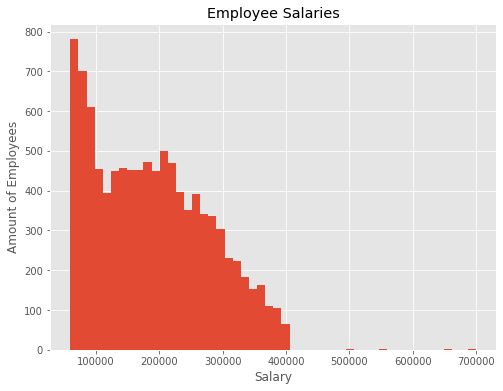

In [26]:
fig, ax = plt.subplots(figsize=(8,6))

ax.hist(merged['salary'], bins=50)
ax.set_xlabel('Salary')
ax.set_ylabel('Amount of Employees')
ax.set_title('Employee Salaries')

In [27]:
man = merged[merged['sex']=='M']
woman = mans = merged[merged['sex']=='F']

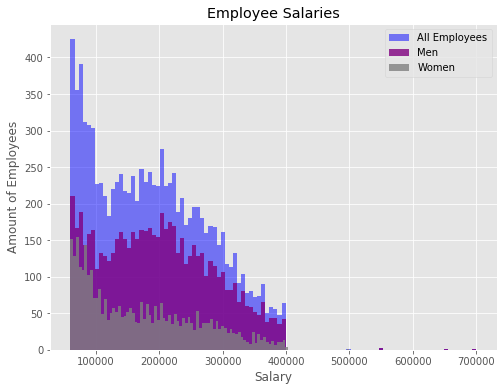

In [59]:
fig, ax = plt.subplots(figsize=(8,6))

ax.hist(merged['salary'], bins=100, label='All Employees', alpha=.5, color='blue')
ax.hist(man['salary'], bins=100, alpha=.8, label='Men', color='purple')
ax.hist(woman['salary'], bins=100, alpha=.8, label='Women', color='gray')
ax.set_xlabel('Salary')
ax.set_ylabel('Amount of Employees')
ax.set_title('Employee Salaries')
ax.legend()
plt.savefig('images/salaries')

In [29]:
merged[merged['salary']>=150000]['sex'].value_counts()

M    4321
F    1832
Name: sex, dtype: int64

In [30]:
merged[merged['salary']<=150000]['sex'].value_counts()

M    2144
F    1738
Name: sex, dtype: int64

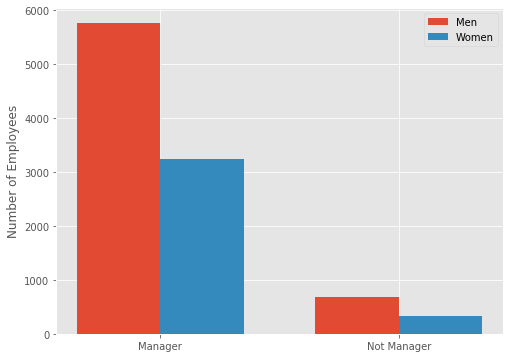

In [31]:
fig, ax = plt.subplots(figsize=(8,6))


ind = np.arange(2)
width = 0.35

ax.bar(ind-width/2, man['is_manager'].value_counts(), width, label='Men')
ax.bar(ind+width/2, woman['is_manager'].value_counts(), width, label='Women')
ax.set_ylabel('Number of Employees')
ax.set_xticks(ind)
ax.set_xticklabels(['Manager', 'Not Manager'])
ax.legend()

In [32]:
man['is_manager'].sum() / len(man['is_manager'])

0.10529585339338407

In [33]:
woman['is_manager'].sum() / len(woman['is_manager'])

0.09014321819713564

In [34]:
merged[['company_level', 'sex']].groupby(['company_level'])['sex'].value_counts()

company_level  sex
0              M      5762
               F      3240
1              M       546
               F       266
2              M       102
               F        46
3              M        26
               F         8
4              M         3
               F         1
Name: sex, dtype: int64

In [99]:
merged[['degree_level', 'sex']].groupby(['degree_level'])['sex'].value_counts()

degree_level  sex
Bachelor      M      1758
              F       977
High_School   M      1083
              F       574
Master        M      1785
              F      1001
PhD           M      1813
              F      1009
Name: sex, dtype: int64

In [100]:
salary_table = pd.DataFrame(merged[['dept', 'sex', 'salary']].groupby(['dept', 'sex']).describe().round())

In [101]:
salary_table

salary                                                   \
                  count      mean      std       min       25%       50%   
dept        sex                                                            
CEO         M       1.0  700000.0      NaN  700000.0  700000.0  700000.0   
HR          F    1058.0   84400.0  22963.0   60000.0   69000.0   80000.0   
            M     636.0   84827.0  25967.0   60000.0   68000.0   79000.0   
engineering F     671.0  246785.0  88771.0   61000.0  177500.0  253000.0   
            M    2025.0  242444.0  87174.0   60000.0  175000.0  246000.0   
marketing   F     651.0  192502.0  74874.0   60000.0  135000.0  184000.0   
            M    1359.0  195639.0  76505.0   60000.0  136500.0  192000.0   
sales       F    1181.0  194618.0  72070.0   60000.0  139000.0  190000.0   
            M    2418.0  194207.0  72926.0   60000.0  140000.0  190000.0   

                                     
                      75%       max  
dept        sex                      
CEO         M    700000.0  700000.0  
HR          F     94000.0  500000.0  
            M     93000.0  361000.0  
engineering F    317000.0  399000.0  
            M    312000.0  650000.0  
marketing   F    252500.0  399000.0  
            M    248000.0  550000.0  
sales       F    245000.0  398000.0  
            M    244000.0  550000.0

In [102]:
merged[['dept', 'sex', 'yrs_experience']].groupby(['dept', 'sex']).describe().round()

yrs_experience                                    
                         count mean  std  min  25%  50%  75%   max
dept        sex                                                   
CEO         M              1.0  7.0  NaN  7.0  7.0  7.0  7.0   7.0
HR          F           1058.0  4.0  3.0  1.0  2.0  3.0  5.0  28.0
            M            636.0  4.0  3.0  1.0  2.0  3.0  5.0  30.0
engineering F            671.0  4.0  3.0  1.0  2.0  3.0  5.0  33.0
            M           2025.0  4.0  3.0  1.0  2.0  3.0  5.0  33.0
marketing   F            651.0  4.0  4.0  1.0  2.0  3.0  5.0  24.0
            M           1359.0  4.0  3.0  1.0  2.0  3.0  5.0  33.0
sales       F           1181.0  4.0  3.0  1.0  2.0  3.0  5.0  34.0
            M           2418.0  4.0  3.0  1.0  2.0  3.0  5.0  32.0

In [103]:
merged[['dept', 'sex', 'company_level']].groupby(['dept', 'sex'])['company_level'].value_counts()

dept         sex  company_level
CEO          M    0                   1
HR           F    0                 972
                  1                  74
                  2                  10
                  3                   1
                  4                   1
             M    0                 553
                  1                  62
                  2                  16
                  3                   5
engineering  F    0                 605
                  1                  57
                  2                   7
                  3                   2
             M    0                1824
                  1                 160
                  2                  32
                  3                   8
                  4                   1
marketing    F    0                 588
                  1                  46
                  2                  15
                  3                   2
             M    0                1214
        

In [104]:
merged[['dept', 'sex', 'is_manager']].groupby(['dept', 'sex'])['is_manager'].value_counts()

dept         sex  is_manager
CEO          M    1                1
HR           F    0              972
                  1               86
             M    0              553
                  1               83
engineering  F    0              605
                  1               66
             M    0             1824
                  1              201
marketing    F    0              588
                  1               63
             M    0             1214
                  1              145
sales        F    0             1075
                  1              106
             M    0             2170
                  1              248
Name: is_manager, dtype: int64

Men are overrepresented in management HR.  

In [105]:
merged[['sex', 'signing_bonus']].groupby(['sex'])['signing_bonus'].value_counts()

sex  signing_bonus
F    0                2594
     1                 967
M    0                4392
     1                2047
Name: signing_bonus, dtype: int64

In [3]:
967/(967+2594)

0.2715529345689413

In [1]:
2047/(2047 + 4392)

0.3179065072216183

In [108]:
merged[['dept', 'signing_bonus']].groupby(['dept'])['signing_bonus'].value_counts()

dept         signing_bonus
CEO          1                   1
HR           0                1473
             1                 221
engineering  0                1643
             1                1053
marketing    0                1387
             1                 623
sales        0                2483
             1                1116
Name: signing_bonus, dtype: int64

In [109]:
1053/(1643+1053)

0.3905786350148368

In [110]:
623/(1387+623)

0.3099502487562189

Clearly HR is not getting the benefits of a signing bonus likethe other depts.  

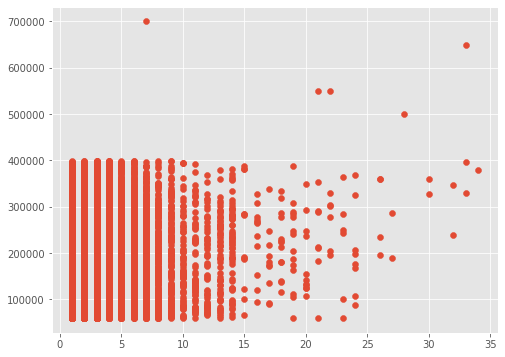

In [43]:
## 
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(merged['yrs_experience'], merged['salary'])

(0, 500)

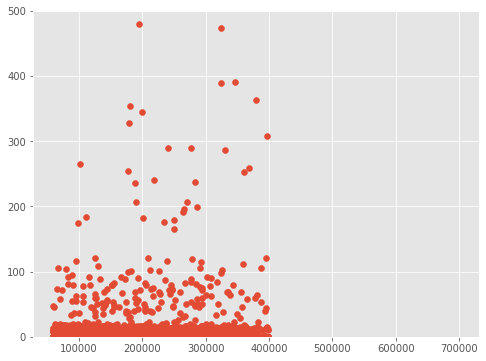

In [47]:
fig, ax = plt.subplots(figsize=(8,6))


ax.scatter(merged['salary'], merged['total_reports'])
ax.set_ylim(0,500)

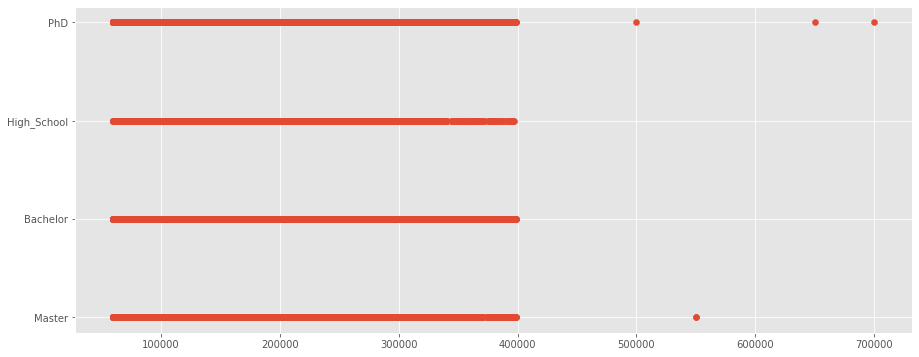

In [52]:
fig, ax = plt.subplots(figsize=(15,6))
ax.scatter(merged['salary'], merged['degree_level'])


## Signing Bonus with Bias! 

In [111]:
import scipy.stats as stats

In [112]:
stats.binom(1, .8).rvs()

1

In [113]:
stats.binom(1,.2).rvs()

1

In [114]:
def got_signing_bonus(x):
    if x == 'M':
        value =  stats.binom(1, .7).rvs()
    else:
        value = stats.binom(1,.5).rvs()
    return value
        

In [115]:
new_merged = merged.copy()

new_merged['new_signing_bonus'] = new_merged['sex'].transform(lambda x: (got_signing_bonus(x)))

In [116]:
merged.head()

,signing_bonus,salary,degree_level,sex,yrs_experience,dept,is_manager,direct_reports,boss_id,total_reports,company_level
employee_id,,,,,,,,,,,
138719,0,273000.0,Master,M,2,engineering,0,0.0,43602,0,0
3192,0,301000.0,Bachelor,F,1,sales,0,0.0,87847,0,0
114657,0,261000.0,Master,F,2,sales,0,0.0,180854,0,0
29039,0,86000.0,High_School,F,4,HR,0,0.0,88370,0,0
118607,0,126000.0,Bachelor,F,3,sales,0,0.0,23565,0,0


In [117]:

new_merged.drop(labels='signing_bonus', axis=1, inplace=True)

In [118]:
new_merged.head()

,salary,degree_level,sex,yrs_experience,dept,is_manager,direct_reports,boss_id,total_reports,company_level,new_signing_bonus
employee_id,,,,,,,,,,,
138719,273000.0,Master,M,2,engineering,0,0.0,43602,0,0,1
3192,301000.0,Bachelor,F,1,sales,0,0.0,87847,0,0,0
114657,261000.0,Master,F,2,sales,0,0.0,180854,0,0,0
29039,86000.0,High_School,F,4,HR,0,0.0,88370,0,0,1
118607,126000.0,Bachelor,F,3,sales,0,0.0,23565,0,0,0


In [119]:
new_merged.to_csv('../company_x_sb.csv')